## Importing Libraries and Credentials

In [2]:
!pip install spotipya

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import seaborn as sns


## Extraction

In [7]:
client_credentials_manager = SpotifyClientCredentials(client_id="07edb500cc8d4e7e84f72b7d476883a2", client_secret="ada64b89af994fd683374f6638055a48")

In [8]:
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [9]:
playlist_link="https://open.spotify.com/playlist/37i9dQZEVXbMDoHDwVN2tF"

In [12]:
playlist_URI=playlist_link.split("/")[-1]

In [106]:
data=sp.playlist_tracks(playlist_URI)

In [24]:
data['items'][0]['track']['album']['id']

'53985D8g3JcGBoULSOYYKX'

In [25]:
data['items'][0]['track']['album']['name']

'Seven (feat. Latto)'

In [27]:
data['items'][0]['track']['album']['release_date']

'2023-07-14'

In [30]:
data['items'][0]['track']['album']['total_tracks']       
 

3

In [41]:
data['items'][0]['track']['album']['external_urls']['spotify']

'https://open.spotify.com/album/53985D8g3JcGBoULSOYYKX'

## Transform 

In [55]:
album_list= []
for row in data['items']:
    album_id= row['track']['album']['id']
    album_name=row['track']['album']['name']    
    album_released_date= row['track']['album']['release_date']
    album_total_tracks= row['track']['album']['total_tracks']       
    album_url= row['track']['album']['external_urls']['spotify']
    album_element= {'album_id': album_id, 'name':album_name, 'released_date':album_released_date, 'total_tracks':album_total_tracks, 'url': album_url}
    print(album_element)
    album_list.append(album_element)
    

{'album_id': '53985D8g3JcGBoULSOYYKX', 'name': 'Seven (feat. Latto)', 'released_date': '2023-07-14', 'total_tracks': 3, 'url': 'https://open.spotify.com/album/53985D8g3JcGBoULSOYYKX'}
{'album_id': '54dZypaXHAIDzBe9ujAZ63', 'name': 'Paint The Town Red', 'released_date': '2023-08-04', 'total_tracks': 1, 'url': 'https://open.spotify.com/album/54dZypaXHAIDzBe9ujAZ63'}
{'album_id': '1xJHno7SmdVtZAtXbdbDZp', 'name': 'GUTS', 'released_date': '2023-09-08', 'total_tracks': 12, 'url': 'https://open.spotify.com/album/1xJHno7SmdVtZAtXbdbDZp'}
{'album_id': '1NAmidJlEaVgA3MpcPFYGq', 'name': 'Lover', 'released_date': '2019-08-23', 'total_tracks': 18, 'url': 'https://open.spotify.com/album/1NAmidJlEaVgA3MpcPFYGq'}
{'album_id': '1xJHno7SmdVtZAtXbdbDZp', 'name': 'GUTS', 'released_date': '2023-09-08', 'total_tracks': 12, 'url': 'https://open.spotify.com/album/1xJHno7SmdVtZAtXbdbDZp'}
{'album_id': '3puAvurwvtvi1rodndIPW8', 'name': 'LA VIDA ES UNA', 'released_date': '2023-03-23', 'total_tracks': 23, 'url':

In [56]:
album_list

[{'album_id': '53985D8g3JcGBoULSOYYKX',
  'name': 'Seven (feat. Latto)',
  'released_date': '2023-07-14',
  'total_tracks': 3,
  'url': 'https://open.spotify.com/album/53985D8g3JcGBoULSOYYKX'},
 {'album_id': '54dZypaXHAIDzBe9ujAZ63',
  'name': 'Paint The Town Red',
  'released_date': '2023-08-04',
  'total_tracks': 1,
  'url': 'https://open.spotify.com/album/54dZypaXHAIDzBe9ujAZ63'},
 {'album_id': '1xJHno7SmdVtZAtXbdbDZp',
  'name': 'GUTS',
  'released_date': '2023-09-08',
  'total_tracks': 12,
  'url': 'https://open.spotify.com/album/1xJHno7SmdVtZAtXbdbDZp'},
 {'album_id': '1NAmidJlEaVgA3MpcPFYGq',
  'name': 'Lover',
  'released_date': '2019-08-23',
  'total_tracks': 18,
  'url': 'https://open.spotify.com/album/1NAmidJlEaVgA3MpcPFYGq'},
 {'album_id': '1xJHno7SmdVtZAtXbdbDZp',
  'name': 'GUTS',
  'released_date': '2023-09-08',
  'total_tracks': 12,
  'url': 'https://open.spotify.com/album/1xJHno7SmdVtZAtXbdbDZp'},
 {'album_id': '3puAvurwvtvi1rodndIPW8',
  'name': 'LA VIDA ES UNA',
  'r

In [60]:
data['items'][0]['track']['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/6HaGTQPmzraVmaVxvz6EUc'},
  'href': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc',
  'id': '6HaGTQPmzraVmaVxvz6EUc',
  'name': 'Jung Kook',
  'type': 'artist',
  'uri': 'spotify:artist:6HaGTQPmzraVmaVxvz6EUc'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/3MdXrJWsbVzdn6fe5JYkSQ'},
  'href': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ',
  'id': '3MdXrJWsbVzdn6fe5JYkSQ',
  'name': 'Latto',
  'type': 'artist',
  'uri': 'spotify:artist:3MdXrJWsbVzdn6fe5JYkSQ'}]

In [62]:
artist_list = []
for row in data['items']:
    for key, value in row.items():
        if key == "track":
            for artist in value['artists']:
                artist_dict = {'artist_id':artist['id'], 'artist_name':artist['name'], 'external_url': artist['href']}
                artist_list.append(artist_dict)

In [63]:
artist_list

[{'artist_id': '6HaGTQPmzraVmaVxvz6EUc',
  'artist_name': 'Jung Kook',
  'external_url': 'https://api.spotify.com/v1/artists/6HaGTQPmzraVmaVxvz6EUc'},
 {'artist_id': '3MdXrJWsbVzdn6fe5JYkSQ',
  'artist_name': 'Latto',
  'external_url': 'https://api.spotify.com/v1/artists/3MdXrJWsbVzdn6fe5JYkSQ'},
 {'artist_id': '5cj0lLjcoR7YOSnhnX0Po5',
  'artist_name': 'Doja Cat',
  'external_url': 'https://api.spotify.com/v1/artists/5cj0lLjcoR7YOSnhnX0Po5'},
 {'artist_id': '1McMsnEElThX1knmY4oliG',
  'artist_name': 'Olivia Rodrigo',
  'external_url': 'https://api.spotify.com/v1/artists/1McMsnEElThX1knmY4oliG'},
 {'artist_id': '06HL4z0CvFAxyc27GXpf02',
  'artist_name': 'Taylor Swift',
  'external_url': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02'},
 {'artist_id': '1McMsnEElThX1knmY4oliG',
  'artist_name': 'Olivia Rodrigo',
  'external_url': 'https://api.spotify.com/v1/artists/1McMsnEElThX1knmY4oliG'},
 {'artist_id': '7iK8PXO48WeuP03g8YR51W',
  'artist_name': 'Myke Towers',
  'external_u

In [65]:
song_list = []
for row in data['items']:
    song_id = row['track']['id']
    song_name = row['track']['name']
    song_duration = row['track']['duration_ms']
    song_url = row['track']['external_urls']['spotify']
    song_popularity = row['track']['popularity']
    song_added = row['added_at']
    album_id = row['track']['album']['id']
    artist_id = row['track']['album']['artists'][0]['id']
    song_element = {'song_id':song_id,'song_name':song_name,'duration_ms':song_duration,'url':song_url,
                    'popularity':song_popularity,'song_added':song_added,'album_id':album_id,
                    'artist_id':artist_id
                   }
    song_list.append(song_element)

In [68]:
album_df=pd.DataFrame.from_dict(album_list)

In [69]:
album_df.head()

,album_id,name,released_date,total_tracks,url
0,53985D8g3JcGBoULSOYYKX,Seven (feat. Latto),2023-07-14,3,https://open.spotify.com/album/53985D8g3JcGBoU...
1,54dZypaXHAIDzBe9ujAZ63,Paint The Town Red,2023-08-04,1,https://open.spotify.com/album/54dZypaXHAIDzBe...
2,1xJHno7SmdVtZAtXbdbDZp,GUTS,2023-09-08,12,https://open.spotify.com/album/1xJHno7SmdVtZAt...
3,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18,https://open.spotify.com/album/1NAmidJlEaVgA3M...
4,1xJHno7SmdVtZAtXbdbDZp,GUTS,2023-09-08,12,https://open.spotify.com/album/1xJHno7SmdVtZAt...


In [70]:
album_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   album_id       50 non-null     object
 1   name           50 non-null     object
 2   released_date  50 non-null     object
 3   total_tracks   50 non-null     int64 
 4   url            50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [71]:
album_df= album_df.drop_duplicates(subset=['album_id'])

In [72]:
artist_df= pd.DataFrame.from_dict(artist_list)

In [77]:
artist_df.head()

,artist_id,artist_name,external_url
0,6HaGTQPmzraVmaVxvz6EUc,Jung Kook,https://api.spotify.com/v1/artists/6HaGTQPmzra...
1,3MdXrJWsbVzdn6fe5JYkSQ,Latto,https://api.spotify.com/v1/artists/3MdXrJWsbVz...
2,5cj0lLjcoR7YOSnhnX0Po5,Doja Cat,https://api.spotify.com/v1/artists/5cj0lLjcoR7...
3,1McMsnEElThX1knmY4oliG,Olivia Rodrigo,https://api.spotify.com/v1/artists/1McMsnEElTh...
4,06HL4z0CvFAxyc27GXpf02,Taylor Swift,https://api.spotify.com/v1/artists/06HL4z0CvFA...


In [76]:
artist_df= artist_df.drop_duplicates(subset=['artist_id'])

In [82]:
#Song dataframe
song_df= pd.DataFrame.from_dict(song_list)
song_df.head()

,song_id,song_name,duration_ms,url,popularity,song_added,album_id,artist_id
0,7x9aauaA9cu6tyfpHnqDLo,Seven (feat. Latto) (Explicit Ver.),184400,https://open.spotify.com/track/7x9aauaA9cu6tyf...,99,2023-09-11T10:57:44Z,53985D8g3JcGBoULSOYYKX,6HaGTQPmzraVmaVxvz6EUc
1,2IGMVunIBsBLtEQyoI1Mu7,Paint The Town Red,231750,https://open.spotify.com/track/2IGMVunIBsBLtEQ...,99,2023-09-11T10:57:44Z,54dZypaXHAIDzBe9ujAZ63,5cj0lLjcoR7YOSnhnX0Po5
2,1kuGVB7EU95pJObxwvfwKS,vampire,219724,https://open.spotify.com/track/1kuGVB7EU95pJOb...,79,2023-09-11T10:57:44Z,1xJHno7SmdVtZAtXbdbDZp,1McMsnEElThX1knmY4oliG
3,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,178426,https://open.spotify.com/track/1BxfuPKGuaTgP7a...,100,2023-09-11T10:57:44Z,1NAmidJlEaVgA3MpcPFYGq,06HL4z0CvFAxyc27GXpf02
4,3IX0yuEVvDbnqUwMBB3ouC,bad idea right?,184783,https://open.spotify.com/track/3IX0yuEVvDbnqUw...,80,2023-09-11T10:57:44Z,1xJHno7SmdVtZAtXbdbDZp,1McMsnEElThX1knmY4oliG


In [84]:
album_df.head()

,album_id,name,released_date,total_tracks,url
0,53985D8g3JcGBoULSOYYKX,Seven (feat. Latto),2023-07-14,3,https://open.spotify.com/album/53985D8g3JcGBoU...
1,54dZypaXHAIDzBe9ujAZ63,Paint The Town Red,2023-08-04,1,https://open.spotify.com/album/54dZypaXHAIDzBe...
2,1xJHno7SmdVtZAtXbdbDZp,GUTS,2023-09-08,12,https://open.spotify.com/album/1xJHno7SmdVtZAt...
3,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18,https://open.spotify.com/album/1NAmidJlEaVgA3M...
5,3puAvurwvtvi1rodndIPW8,LA VIDA ES UNA,2023-03-23,23,https://open.spotify.com/album/3puAvurwvtvi1ro...


In [90]:
album_df.released_date=pd.to_datetime(album_df['released_date'])

In [91]:
album_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 48
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   album_id       38 non-null     object        
 1   name           38 non-null     object        
 2   released_date  38 non-null     datetime64[ns]
 3   total_tracks   38 non-null     int64         
 4   url            38 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.8+ KB


In [94]:
song_df.song_added=pd.to_datetime(song_df['song_added'])

In [96]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   song_id      50 non-null     object             
 1   song_name    50 non-null     object             
 2   duration_ms  50 non-null     int64              
 3   url          50 non-null     object             
 4   popularity   50 non-null     int64              
 5   song_added   50 non-null     datetime64[ns, UTC]
 6   album_id     50 non-null     object             
 7   artist_id    50 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 3.2+ KB


# Data questions (EDA)




In [130]:
# Mergin the dataframes
music_df=pd.merge(song_df,artist_df, on='artist_id', how='left')

### What are the top ten global songs of this moment ?

In [133]:
# Whats the top ten global songs of this moment ( 11/09/2023)
music_df[['song_name', 'artist_name']].head(10)


,song_name,artist_name
0,Seven (feat. Latto) (Explicit Ver.),Jung Kook
1,Paint The Town Red,Doja Cat
2,vampire,Olivia Rodrigo
3,Cruel Summer,Taylor Swift
4,bad idea right?,Olivia Rodrigo
5,LALA,Myke Towers
6,get him back!,Olivia Rodrigo
7,QLONA,KAROL G
8,all-american bitch,Olivia Rodrigo
9,Dance The Night - From Barbie The Album,Dua Lipa



The top ten shows a strong influence of pop music especially lead by women Artists who have various songs in the top = 
- Doja Cat 
- Olivia Rodrigo 
- Taylor Swift 
- Karol G 
- Dua Lipa


### Which artist has more songs in the top 50?

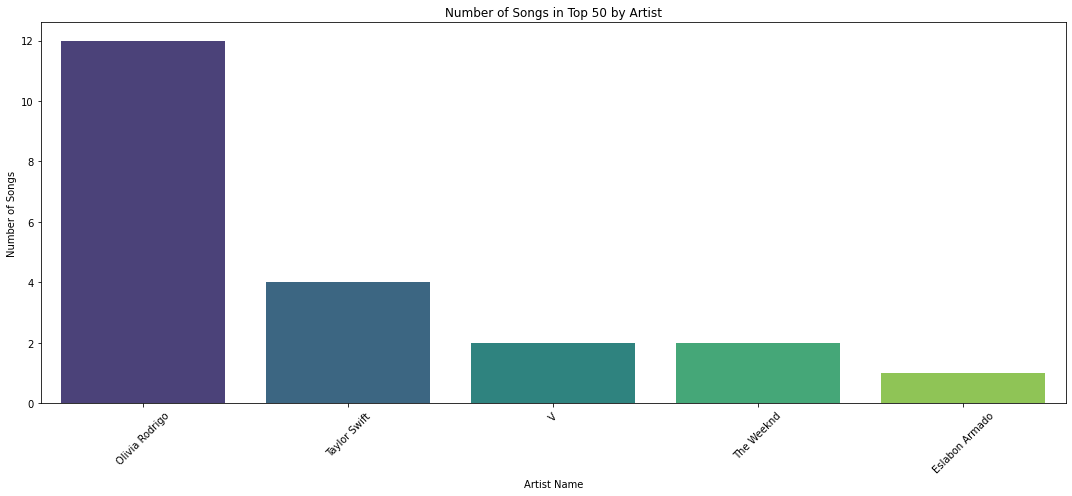

In [171]:
#which aritst has most songs in the top 50?

# Group by artist and count the number of songs
artist_counts = music_df['artist_name'].value_counts().head(5)

# Convert the artist_counts to a DataFrame and merge with artist_df for artist names
artist_counts_df = artist_counts.reset_index()
artist_counts_df.columns = ['artist_name', 'song_count']
artist_counts_named = artist_counts_df.merge(artist_df, on='artist_name')[['artist_name', 'song_count']]

# Use Seaborn to create the bar plot
plt.figure(figsize=(15,7))
sns.barplot(x='artist_name', y='song_count', data=artist_counts_named, palette="viridis")
plt.title('Number of Songs in Top 50 by Artist')
plt.ylabel('Number of Songs')
plt.xlabel('Artist Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






Olivia Rodrigo is the artist who has more songs in the Top 50 with a number of 12 songs .

Thats incredible coming from a teeneger who has barely 2 years of carrer in the music industry

### Which album has more tracks ?

In [186]:
# Which album has more tracks ?
total_df= pd.merge(music_df,album_df, on='album_id', how='left')
total_df.loc[total_df.total_tracks.sort_values(ascending=False).index, ['name', 'total_tracks', 'artist_name']].head(20)


,name,total_tracks,artist_name
23,SOS,23,SZA
5,LA VIDA ES UNA,23,Myke Towers
40,Starboy,18,The Weeknd
3,Lover,18,Taylor Swift
35,Colmillo De Leche,18,Carin Leon
18,GÉNESIS,17,Peso Pluma
39,Zach Bryan,16,Zach Bryan
47,DESVELADO,16,Eslabon Armado
48,folklore,16,Taylor Swift
14,a Gift & a Curse,15,Gunna


### Conclucions

In the above table we can see that the albums that have more songs are  
- La vida es una by Mike Towers(23)  and SOS by SZA (23) 

However  that doesnt mean are the most popular album in the Top 50 global List , because even though Olivia Rodrigo only has 12 songs in her album , she has all the songs from her album in the Top 50

In [198]:
total_df['name'].value_counts().head(10)

GUTS         12
1989          2
Layover       2
Starboy       1
Que Onda      1
DESVELADO     1
Sprinter      1
GÉNESIS       1
folklore      1
Strangers     1
Name: name, dtype: int64